# Part 0 - Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
#if you are using google colab, use cv2_imshow
### if not, ignore and simply use cv2.imshow

# Part 1  - Basic Operations


|Task     | Command                 | Return                     |
|---------|:-----------------------:|---------------------------:|
| Reading | `imread(filename, flag)`| image as numpy.ndarray     |
| Showing |`imshow(window, image)`  | none                       |
| Wait    | `waitKey(time)`         | ASCII code of key pressed  |

While using jupyter notebook ensure that you use the following command after every `imshow`:

```python
#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows    
cv2.destroyAllWindows()
```


So, read the image file provided for you, and display it using below blocks.

In [ ]:
image = cv2.imread('img.jpeg')
assert image is not None, "file could not be read, check with os.path.exists()"

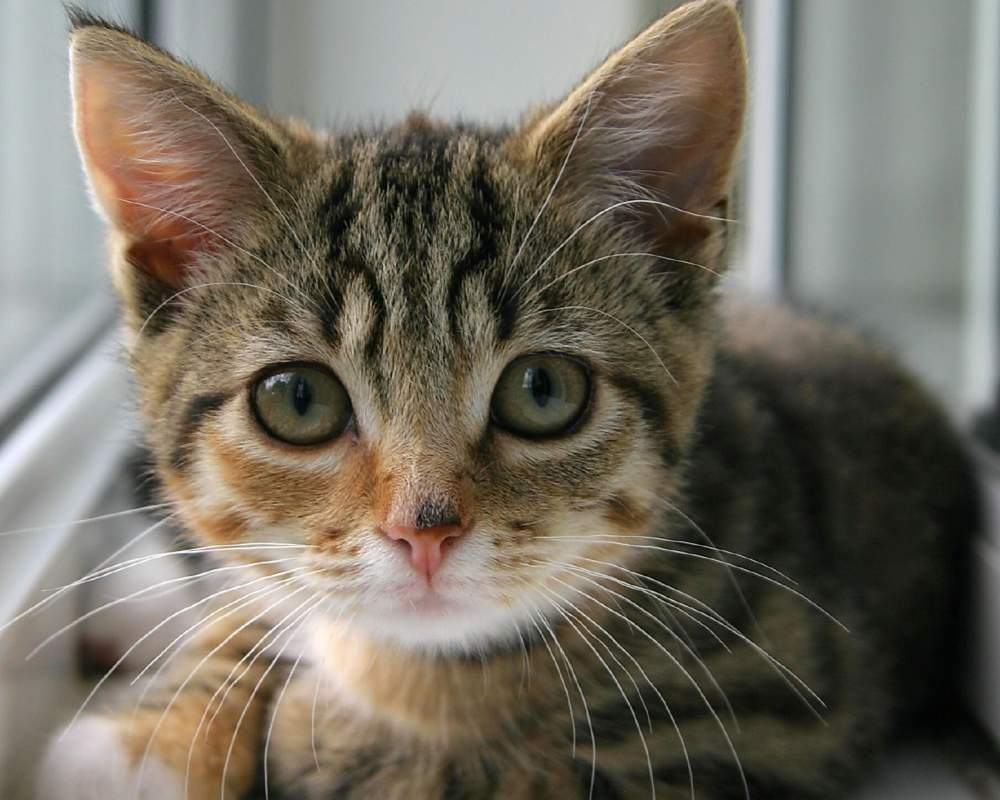

In [ ]:
cv2_imshow(image)

In [ ]:
#Basic stats of the image
print("The loaded image is of type:",type(image))
print("The loaded image is of size:",image.shape)
print("intensity at index 750, 750 is:", image[750][750])

The loaded image is of type: <class 'numpy.ndarray'>
The loaded image is of size: (800, 1000, 3)
intensity at index 750, 750 is: [41 59 60]


As you noticed, the image size is too big. we have to resize it.

In [ ]:
image = cv2.resize(image, (400, 300))
print("size is",image.shape)

size is (300, 400, 3)


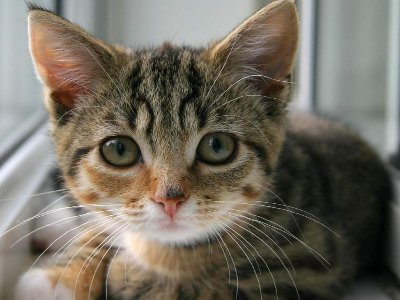

In [ ]:
cv2_imshow(image)

# Part 2 - Colors

Interesting thing to note is that the opencv deals with the images in the BGR color system. so if you use plt.imshow, you will notice changes in color.

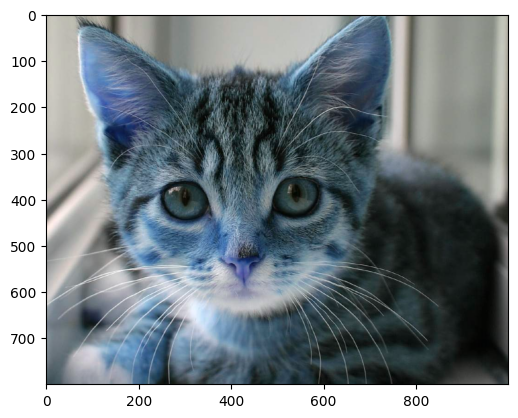

In [ ]:
plt.imshow(image)

How to solve it though?

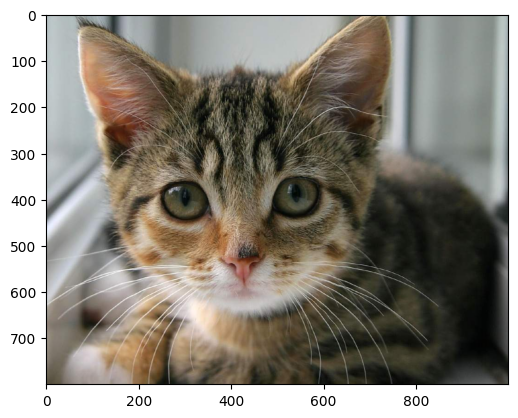

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself), we can just pick one channel of our data using array slicing

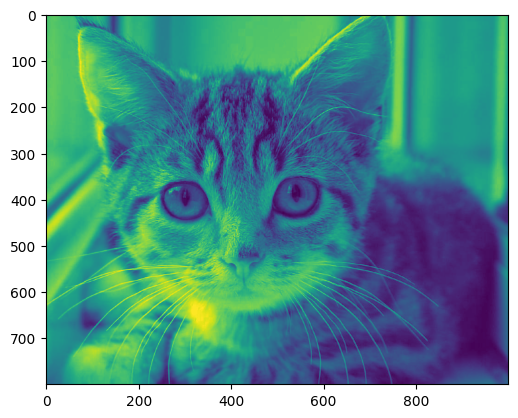

In [ ]:
lum_img = image[:, :, 0]
plt.imshow(lum_img)

It's helpful to have an idea of what value a color represents. We can do that by adding a color bar to your figure:

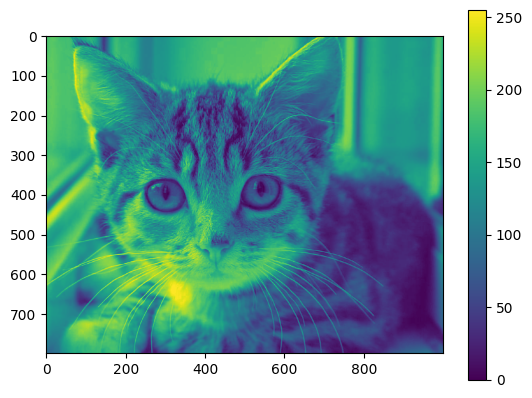

In [ ]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

(array([  94.,   64.,  276., 1516.,  977., 1256., 1220., 1390., 1374.,
        2033., 2496., 1688., 1794., 1752., 1967., 1847., 2219., 2674.,
        3137., 3338., 3787., 3847., 4176., 4071., 4524., 5022., 5125.,
        4977., 4971., 4234., 4463., 3989., 4193., 4062., 3836., 3866.,
        3670., 3570., 3559., 3510., 3403., 3343., 3087., 3234., 3303.,
        3206., 3220., 3322., 3242., 3144., 3163., 3164., 3098., 3213.,
        3394., 3296., 3282., 3479., 3534., 3527., 3678., 3511., 3738.,
        3701., 3678., 3655., 3578., 3649., 3434., 3595., 3425., 3385.,
        3414., 3342., 3272., 3289., 3204., 3234., 3184., 3148., 3333.,
        3161., 3301., 3327., 3273., 3371., 3357., 3323., 3333., 3340.,
        3324., 3374., 3213., 3354., 3362., 3167., 3276., 3184., 3162.,
        3117., 3164., 3077., 3166., 3214., 3274., 3245., 3257., 3353.,
        3383., 3556., 4359., 3764., 3886., 3760., 3767., 3645., 3520.,
        3521., 3559., 3434., 3446., 3457., 3578., 3626., 3700., 3861.,
      

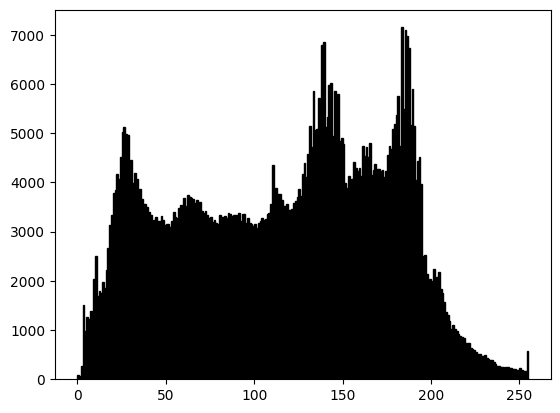

In [ ]:
plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')

# Part 3 -  Homework begins!

TODO

Read an image from [this URL](https://placekitten.com/600/450) and display it.

What is the size of the image?

What type of image is it?

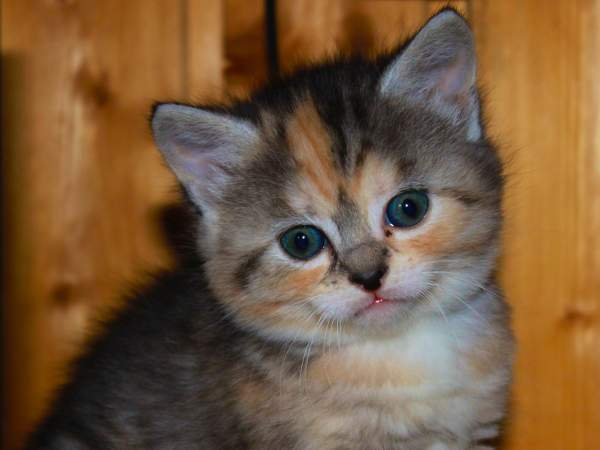

((450, 600, 3), dtype('uint8'))

In [2]:
import cv2
import urllib.request
import numpy as np

# download the image from the web
img_url = "https://placekitten.com/600/450"
req = urllib.request.urlopen(img_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # Load it as it is

# display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# dsply the size and type of the image
img_size = img.shape
img_type = img.dtype

img_size, img_type

As we can see the size of picture is (450, 600, 3) and it is a RGB picture of a cat.

## Visualize RGB Channels

Display each channel of the input image.

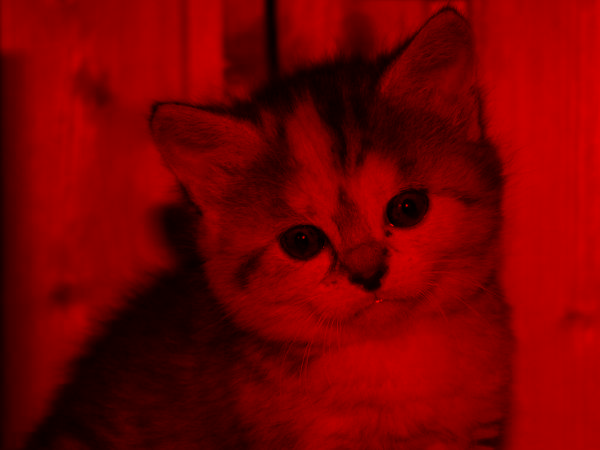

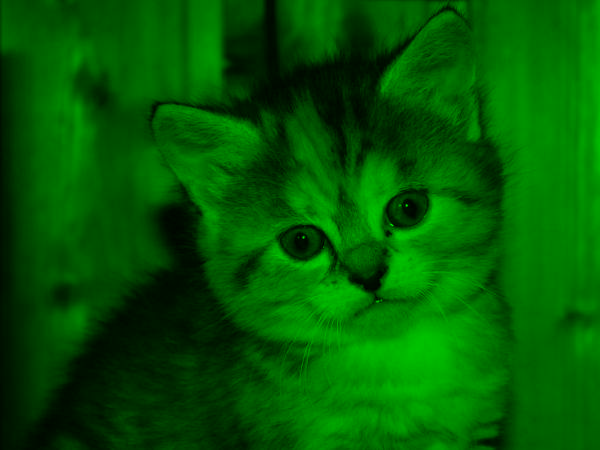

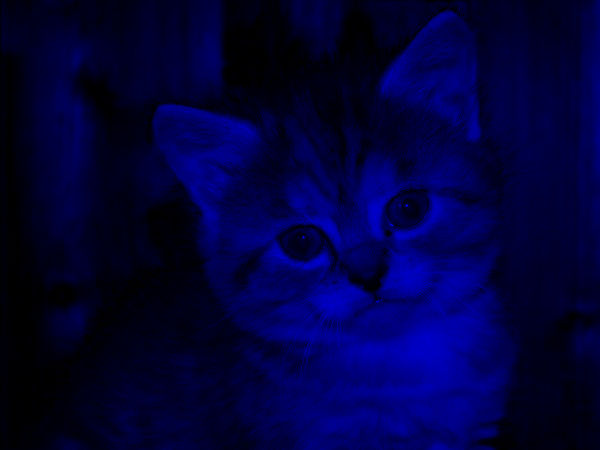

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# split the image into its channels
B, G, R = cv2.split(img)

# creating a blank image with zeros
blank = np.zeros_like(B)

# merge]ing with the blank image to get individual channel images in color
red = cv2.merge([blank, blank, R])
green = cv2.merge([blank, G, blank])
blue = cv2.merge([B, blank, blank])

# Display each channel
cv2_imshow(red)  # red
cv2_imshow(green)  # green
cv2_imshow(blue)  # blue


## Negative of an Image
In this part, you will have to implement and display the negative of the image. in both Gray, and RGB spaces.
do not use built-in functions.

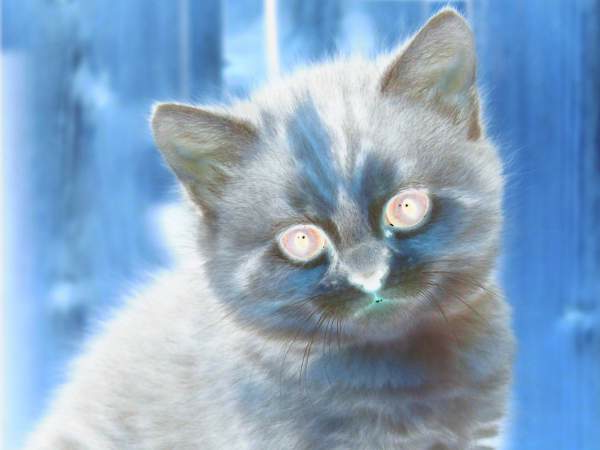

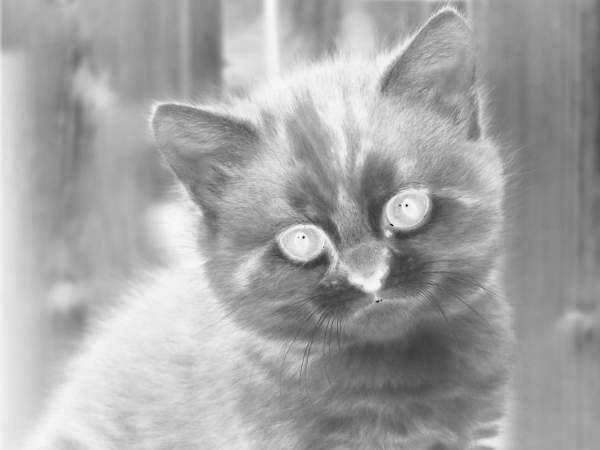

In [4]:
# Function to convert to grayscale without using built-in cv2 function
def convert_to_grayscale(image):
    return np.mean(image, axis=2).astype(image.dtype)

# Function to invert the image
def invert_image(image):
    return 255 - image

# Invert the RGB image
img_negative_rgb = invert_image(img)

# Convert to grayscale and invert
img_gray = convert_to_grayscale(img)
img_negative_gray = invert_image(img_gray)

cv2_imshow(img_negative_rgb)  # Negative RGB
cv2_imshow(img_negative_gray)  # Negative Gray

## Binarize Image
 Convert the input image to Gray, and then binarize it. do not use built-in functions.

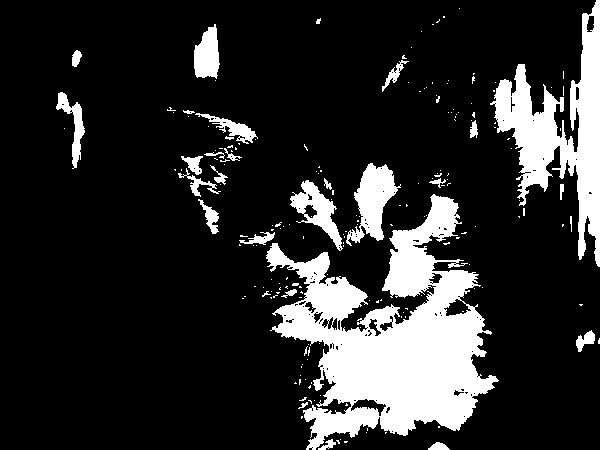

In [5]:
# Function to binarize the image without using built-in cv2 functions
def binarize_image(image, threshold=127):
    binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return binary_image

# Convert to grayscale
img_gray = convert_to_grayscale(img)

# Binarize the grayscale image
img_binary = binarize_image(img_gray)

cv2_imshow(img_binary)  # binary image

## Bit-Plane Slicing


Perform Bit-Plane Slicing on the input image.
Implement the function yourself, do not use built-in functions.

Bit plane 0:


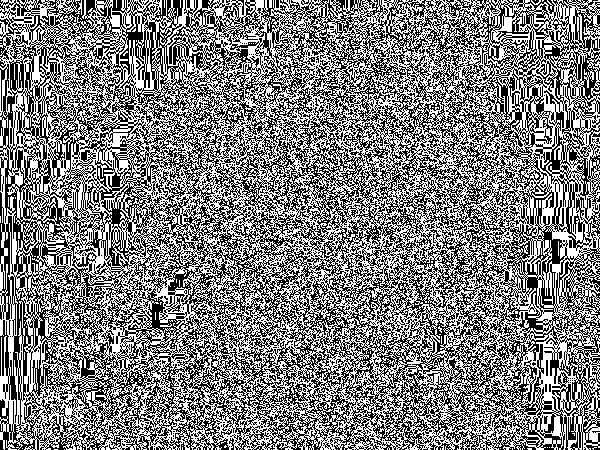



Bit plane 1:


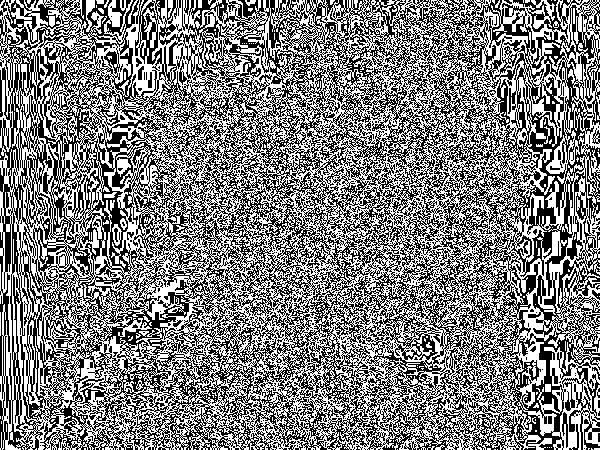



Bit plane 2:


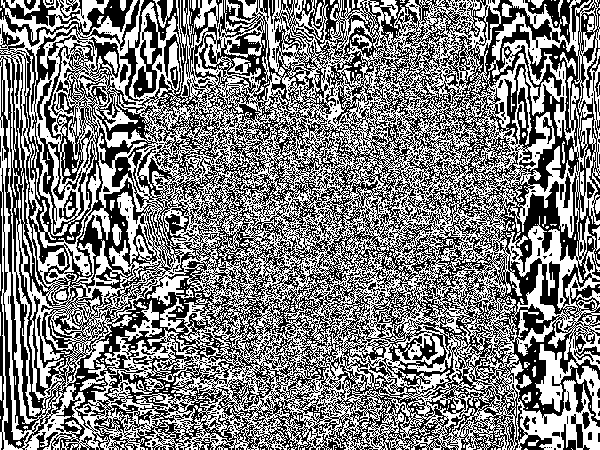



Bit plane 3:


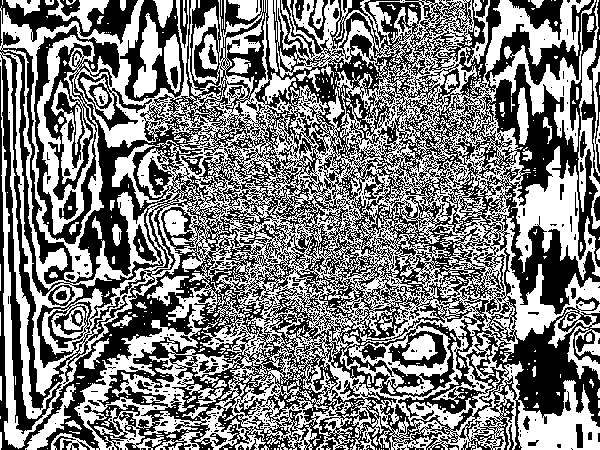



Bit plane 4:


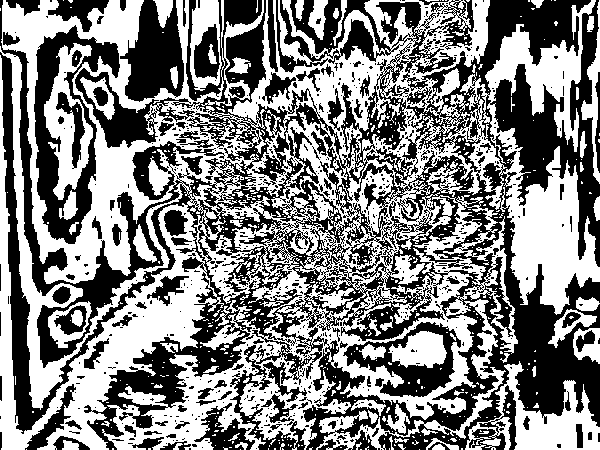



Bit plane 5:


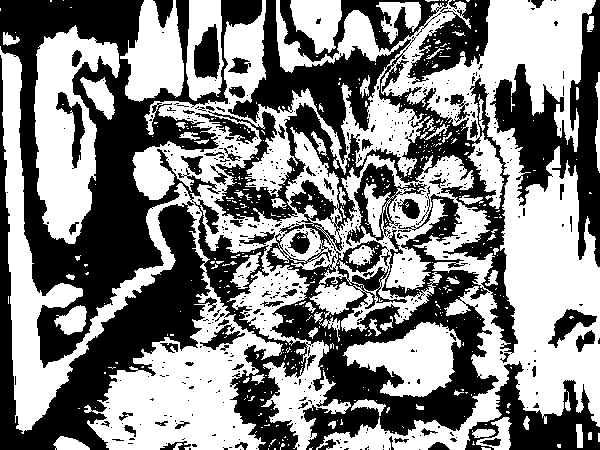



Bit plane 6:


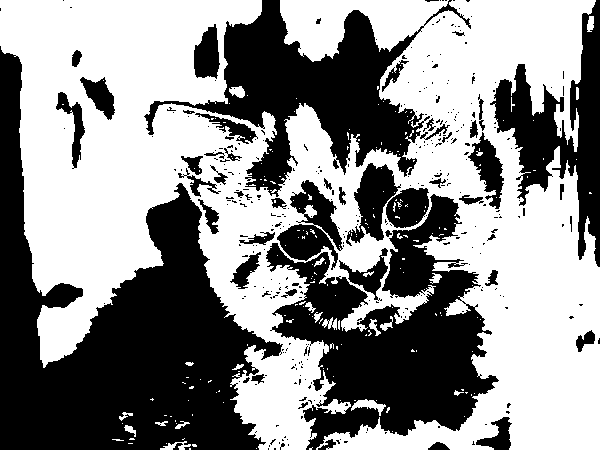



Bit plane 7:


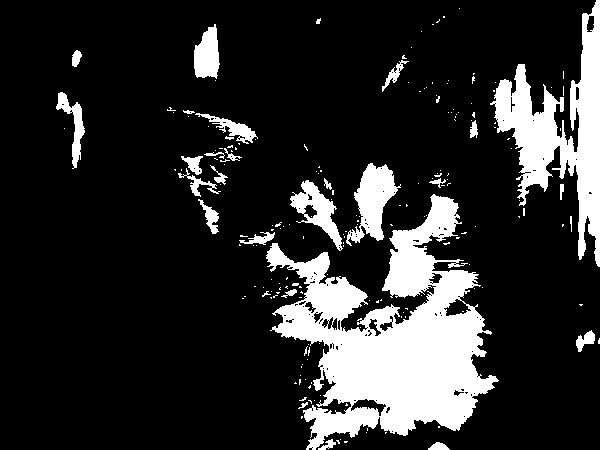

In [6]:
# Function to perform bit-plane slicing
def bit_plane_slicing(image):
    bit_planes = []

    # Loop over each bit plane
    for bit in range(8):
        # Shift the bit of interest to the rightmost position and isolate it
        bit_plane = (image >> bit) & 1

        # Convert the isolated bit to a full 8-bit representation for visibility
        bit_plane *= 255

        # Store the result
        bit_planes.append(bit_plane.astype(np.uint8))

    return bit_planes

# Convert to grayscale
img_gray = convert_to_grayscale(img)

bit_planes = bit_plane_slicing(img_gray)
for i, bit_plane in enumerate(bit_planes):
    print(f"Bit plane {i}:")
    cv2_imshow(bit_plane)  # Display each bit-plane image separately
    print("\n")

## HSV Color System
In this part we wat to change the RGB Color System to HSV.


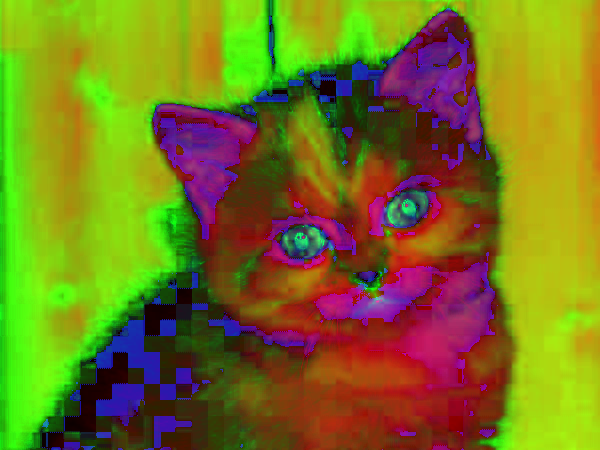

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

As you can see, cv2.cvtColor() function converts colorspace.
You have to write your own function RGB_to_HSV without using opencv and other built-in functions, to convert an RGB image to an HSV one. compare your results with the above code block.

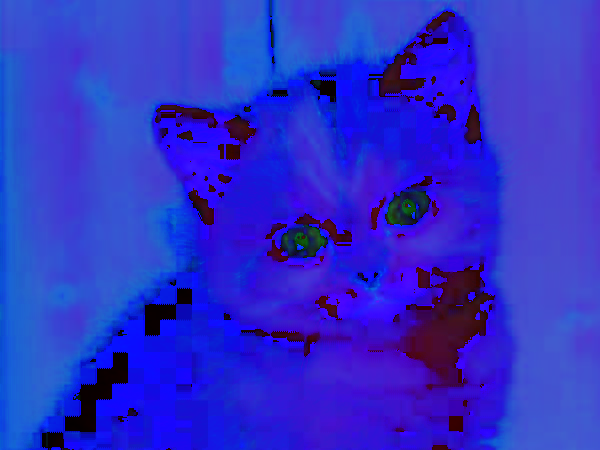

In [13]:
import numpy as np

def RGB_to_HSV(rgb_image):
    hsv_image = np.zeros_like(rgb_image, dtype=float)

    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            r, g, b = rgb_image[i, j] / 255.0
            max_c = max(r, g, b)
            min_c = min(r, g, b)
            delta = max_c - min_c

            # Hue Calculation
            if delta == 0:
                h = 0
            elif max_c == r:
                h = (60 * ((g - b) / delta) + 360) % 360
            elif max_c == g:
                h = (60 * ((b - r) / delta) + 120) % 360
            elif max_c == b:
                h = (60 * ((r - g) / delta) + 240) % 360

            # Saturation Calculation
            if max_c == 0:
                s = 0
            else:
                s = (delta / max_c)

            # Value Calculation
            v = max_c

            hsv_image[i, j] = [h, s * 100, v * 100]

    return hsv_image


img_hsv_custom = RGB_to_HSV(img)
cv2_imshow(img_hsv_custom)

The difference between my implementation and OpenCV is mainly beacause of scaling and rounding errors. OpenCV scales the Hue value between 0 and 179 to fit into an 8-bit image representation, while Saturation and Value are scaled between 0 and 255. In contrast, the custom function provided scales Hue from 0 to 360 (degrees), and Saturation and Value from 0 to 100 (percentages). In the next cell I scale the values to best fit the OpenCV version.

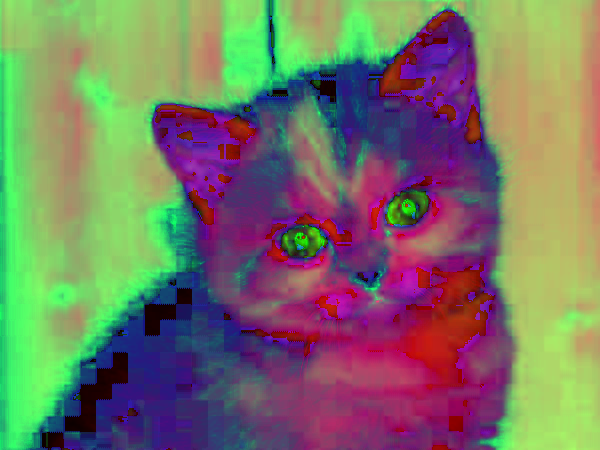

In [16]:
def RGB_to_HSV_opencv_scale(rgb_image):
    hsv_image = np.zeros_like(rgb_image, dtype=np.float32)

    for i in range(rgb_image.shape[0]):
        for j in range(rgb_image.shape[1]):
            r, g, b = rgb_image[i, j] / 255.0
            max_c = max(r, g, b)
            min_c = min(r, g, b)
            delta = max_c - min_c

            # Hue Calculation
            if delta == 0:
                h = 0
            elif max_c == r:
                h = (60 * ((g - b) / delta) + 360) % 360
            elif max_c == g:
                h = (60 * ((b - r) / delta) + 120) % 360
            elif max_c == b:
                h = (60 * ((r - g) / delta) + 240) % 360

            # Saturation Calculation
            if max_c == 0:
                s = 0
            else:
                s = (delta / max_c)

            # Value Calculation
            v = max_c

            # Convert the scale of H, S, and V to match OpenCV
            h = (h / 2)  # Scale H to 0-179
            s = s * 255  # Scale S to 0-255
            v = v * 255  # Scale V to 0-255

            hsv_image[i, j] = [h, s, v]

    return hsv_image.astype(np.uint8)

img_hsv_custom_scaled = RGB_to_HSV_opencv_scale(img)
cv2_imshow(img_hsv_custom_scaled)

The HSV color system is used to detect the color as all the chromatic information is in one band.

Here we want to extract the Red color from image.
Research how to do so, write your conclusions and implement it here.


### Identifying Red Color in HSV Space

In the HSV color space:

- **Hue (H)** represents the color type, ranging from 0 to 360 degrees but scaled to 0-179 in OpenCV to fit into 8 bits.
- **Saturation (S)** indicates the vibrancy of the color, with lower values leading to more white (towards 0) and higher values resulting in more pure color (towards 100% or 255 in OpenCV).
- **Value (V)** represents the brightness, with lower values being darker (towards 0) and higher values being brighter (towards 100% or 255 in OpenCV).

Red color can appear in two ranges due to its position at the beginning (0 degrees) and end (360 degrees) of the Hue circle. Thus, you might need to define two ranges to capture all shades of red effectively, especially in the scaled 0-179 range used by OpenCV.

### Conclusions for Extracting Red Color

- **Define Red Hue Ranges**: For OpenCV, red color typically falls within two Hue ranges: around 0-10 and 170-179.
- **Choose Saturation and Value Ranges**: To ensure we capture vivid and visible shades of red, it's recommended to choose a moderately high Saturation and a broad Value range. For example, Saturation can be set above 100 (in the 0-255 scale), and Value can be adjusted based on the desired brightness level, but keeping it above 50 often works well to avoid very dark reds.


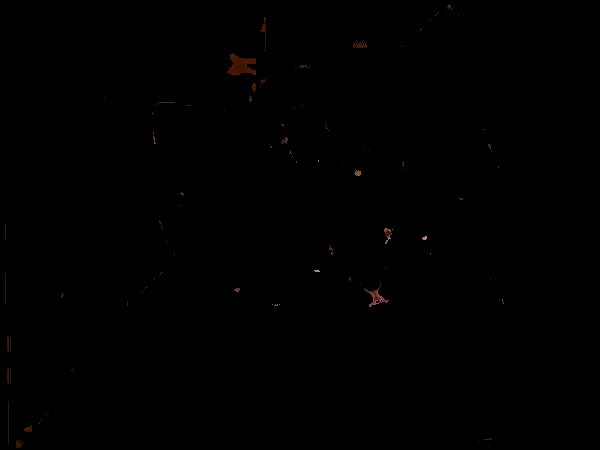

In [18]:
# Define range for lower red
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])

# Define range for upper red
lower_red2 = np.array([170, 100, 50])
upper_red2 = np.array([179, 255, 255])

# Threshold the HSV image to get only red colors
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combine masks
red_mask = cv2.bitwise_or(mask1, mask2)

red_extracted = cv2.bitwise_and(img, img, mask=red_mask)
cv2_imshow(red_extracted)

## Histogram Equalization
In this section you will have to perform histogram equalization on the gray image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range).

To do so,
1. first display the original histogram of the image using built-in functions,
2. Then write a function to perform Histogram Equalization without using any built-in function, only Numpy.
3. Use the cv2.equalizeHist to compare your results.

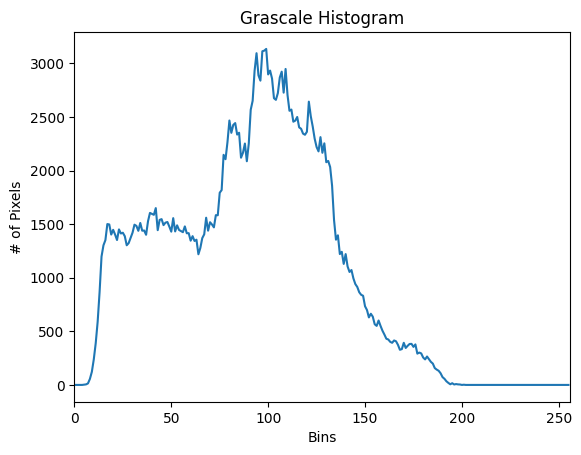

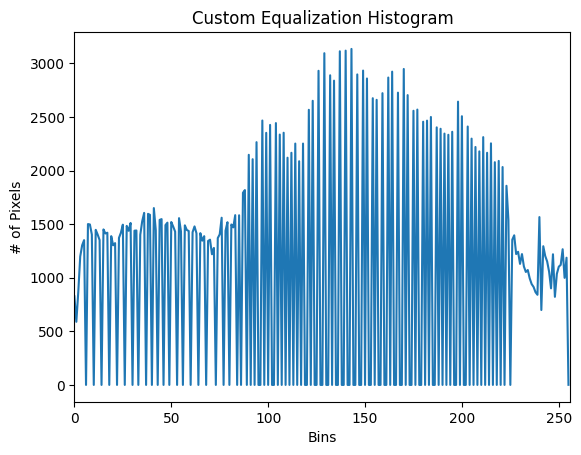

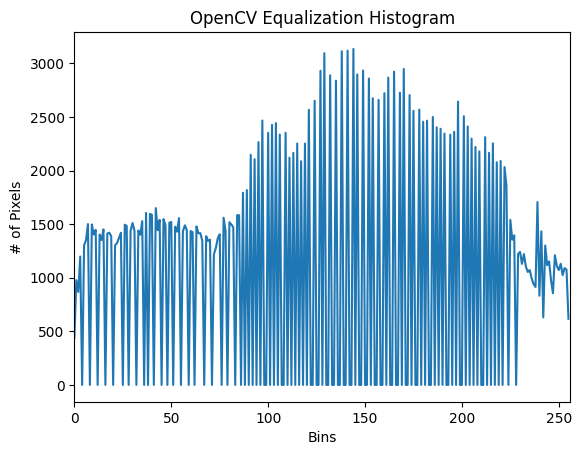

Actual Grayscale Image:


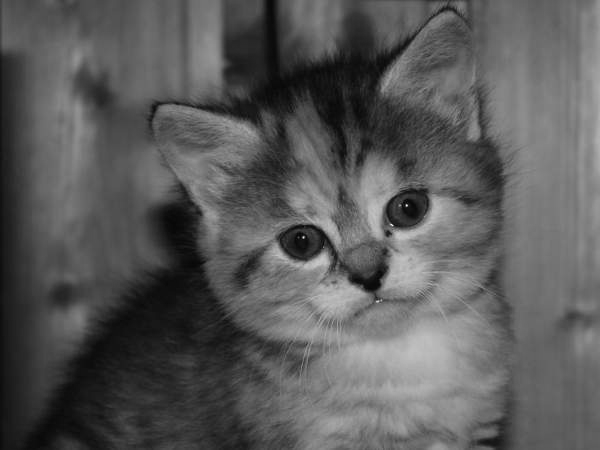

Custom Equalization Image:


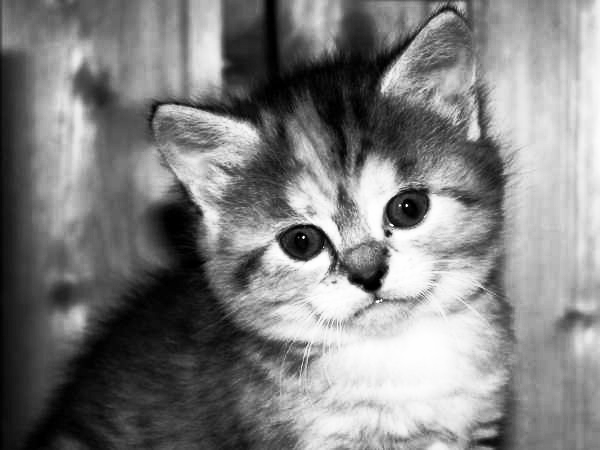

OpenCV Equalization Image:


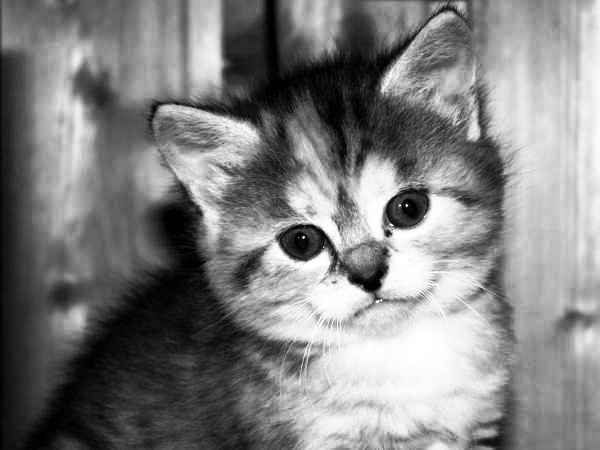

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def plot_hist(hist, title):
    # Plot the histogram
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

def hist_eq(image):
    # flatten the image array
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    # calculate cdf
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Mask all zeros and normalize
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())

    # Fill the masked values with 0
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img_eq = cdf[image]

    return img_eq

# custom histogram equalization
img_eq_custom = hist_eq(img_gray)

# OpenCV's histogram equalization
img_eq_cv2 = cv2.equalizeHist(img_gray)

hist1 = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img_eq_custom], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img_eq_cv2], [0], None, [256], [0, 256])
plot_hist(hist1, "Grascale Histogram")
plot_hist(hist2, "Custom Equalization Histogram")
plot_hist(hist3, "OpenCV Equalization Histogram")

# Display the images
print("Actual Grayscale Image:")
cv2_imshow(img_gray)
print("Custom Equalization Image:")
cv2_imshow(img_eq_custom)
print("OpenCV Equalization Image:")
cv2_imshow(img_eq_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()
